# Model Interpretation

In [1]:
import sys
sys.path.append('/Users/c242587/Desktop/projects/git/ngboost')

In [2]:
from ngboost import NGBClassifier, NGBRegressor
from ngboost.distns import k_categorical, Normal
from ngboost.scores import LogScore

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split

X, Y = load_boston(True)
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = train_test_split(X, Y, test_size=0.2)

X, y = load_breast_cancer(True)
y[0:15] = 2 # artificially make this a 3-class problem instead of a 2-class problem
X_cls_train, X_cls_test, Y_cls_train, Y_cls_test  = train_test_split(X, y, test_size=0.2)

We caution users [against trying to interpret](https://arxiv.org/abs/1606.03490) too much from any machine learning model, but NGBoost does provide methods to interpret models fit with regression tree base learners. Since each parameter in the distribution is fit by a separate sequence of learners, there will be multiple model interpretation results, one for each parameter. The default distribution used is `Normal` so the following example shows results for the `loc` and `scale` parameters.

## Feature Importance

In [3]:
ngb = NGBRegressor(verbose=False).fit(X_reg_train, Y_reg_train)

## Feature importance for loc trees
feature_importance_loc = ngb.feature_importances_[0]

## Feature importance for scale trees
feature_importance_scale = ngb.feature_importances_[1]

Text(0.5, 1.0, 'scale param')

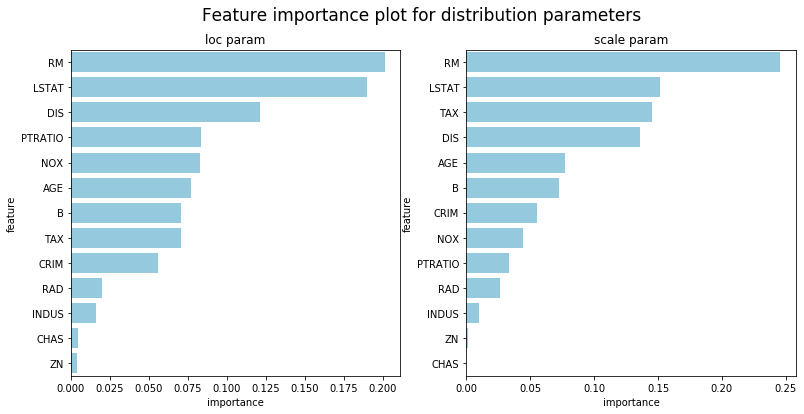

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_loc = pd.DataFrame({'feature':load_boston()['feature_names'], 
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False)
df_scale = pd.DataFrame({'feature':load_boston()['feature_names'], 
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").set_title('scale param')

## SHAP

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


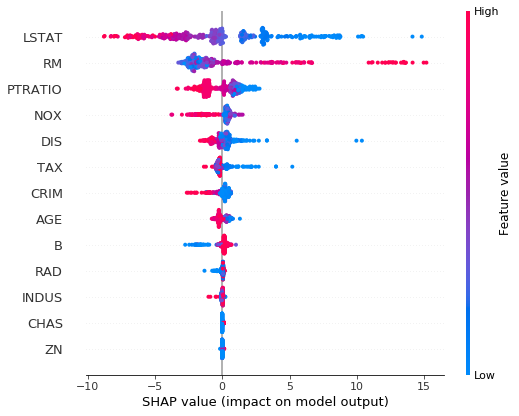

In [6]:
import shap
shap.initjs()

## SHAP plot for loc trees
explainer = shap.TreeExplainer(ngb, model_output=0) # use model_output = 1 for scale trees
shap_values = explainer.shap_values(X_reg_train)
shap.summary_plot(shap_values, X_reg_train, feature_names=load_boston()['feature_names'])